#Problem Statement-2

## Detectron Mask R-CNN Demo

The objective is to use Mask RCNN technique for instance segmentation on the COCO dataset




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Clone the Facebook Detectron Model

In [ ]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/facebookresearch/Detectron.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # clone
  !git clone -q --depth 1 $git_repo_url
  # dependencies
  !cd $project_name && pip install -q -r requirements.txt
  # build
  !cd $project_name && make
# test Detectron
!python $project_name/detectron/tests/test_spatial_narrow_as_op.py 


     |████████████████████████████████| 375 kB 5.3 MB/s 
python setup.py develop --user
Compiling detectron/utils/cython_bbox.pyx because it changed.
Compiling detectron/utils/cython_nms.pyx because it changed.
[1/2] Cythonizing detectron/utils/cython_bbox.pyx
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/Detectron/detectron/utils/cython_bbox.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
[2/2] Cythonizing detectron/utils/cython_nms.pyx
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/Detectron/detectron/utils/cython_nms.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
running develop
running egg_info
creating Detectron.egg-info
writing Detectron.egg-info/PKG-INFO
writ

## Import the Libraries

In [ ]:
import sys
sys.path.append(project_name)
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False
import cv2
from IPython.display import clear_output
import os

## Load pretrained weights

In [ ]:
pretrained_wts='/content/drive/MyDrive/model_final.pkl'


## Making on a test image directory

First, download a test image from the internet:

In [ ]:
!pwd

/content


In [ ]:
!mkdir test_images
%cd test_images

/content/test_images


In [ ]:
IMAGE_URL1 = 'https://raw.githubusercontent.com/tugstugi/dl-colab-notebooks/master/resources/traffic_camera.jpg'
image_url2='https://images.all-free-download.com/images/graphiclarge/cute_dog_photo_picture_7_168843.jpg'
image_url3='https://sg-res.9appsdownloading.com/sg/res/jpg/8c/53/65fd87d9e7f4b88e6fffc3c1ef42-29n5.jpg'
# # image_file = basename(IMAGE_URL)
# # image_file_ext = splitext(image_file)[1][1:]
# images_dir = 'test_images'
# !mkdir -p $images_dir && rm -rf $images_dir/*
!wget $IMAGE_URL1
!wget $image_url2
!wget $image_url3

--2021-11-03 14:41:46--  https://raw.githubusercontent.com/tugstugi/dl-colab-notebooks/master/resources/traffic_camera.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2617689 (2.5M) [image/jpeg]
Saving to: ‘traffic_camera.jpg’

traffic_camera.jpg  100%[===================>]   2.50M  --.-KB/s    in 0.06s   

2021-11-03 14:41:46 (39.5 MB/s) - ‘traffic_camera.jpg’ saved [2617689/2617689]

--2021-11-03 14:41:47--  https://images.all-free-download.com/images/graphiclarge/cute_dog_photo_picture_7_168843.jpg
Resolving images.all-free-download.com (images.all-free-download.com)... 51.81.66.158
Connecting to images.all-free-download.com (images.all-free-download.com)|51.81.66.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30223 (30K

## Generating predictions for my own images

In [ ]:
%cd /content/Detectron

/content/Detectron


In [ ]:
!python tools/infer_simple.py \
    --cfg configs/12_2017_baselines/e2e_mask_rcnn_X-101-64x4d-FPN_1x.yaml \
    --wts /content/drive/MyDrive/model_final.pkl \
    --thresh 0.7 \
    --output-dir ../output/ --output-ext png --always-out \
    --image-ext jpg \
    /content/test_images

Found Detectron ops lib: /usr/local/lib/python3.7/dist-packages/torch/lib/libcaffe2_detectron_ops_gpu.so
[E init_intrinsics_check.cc:44] CPU feature avx is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:44] CPU feature avx2 is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:44] CPU feature fma is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
WARNING cnn.py:  25: [====DEPRECATE WARNING====]: you are creating an object from CNNModelHelper class which will be deprecated soon. Please use ModelHelper object with brew module. For more information, please refer to caffe2.ai and python/brew.py, python/brew_test.py for more information.
INFO net.py:  60: Loading weights from: /content/drive/MyDrive/model_final

## Inference for images on demo

In [ ]:
!python tools/infer_simple.py \
    --cfg configs/12_2017_baselines/e2e_mask_rcnn_X-101-64x4d-FPN_1x.yaml \
    --wts /content/drive/MyDrive/model_final.pkl \
    --thresh 0.7 \
    --output-dir ../output/ --output-ext png --always-out \
    --image-ext jpg \
    demo

Found Detectron ops lib: /usr/local/lib/python3.7/dist-packages/torch/lib/libcaffe2_detectron_ops_gpu.so
[E init_intrinsics_check.cc:44] CPU feature avx is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:44] CPU feature avx2 is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:44] CPU feature fma is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
WARNING cnn.py:  25: [====DEPRECATE WARNING====]: you are creating an object from CNNModelHelper class which will be deprecated soon. Please use ModelHelper object with brew module. For more information, please refer to caffe2.ai and python/brew.py, python/brew_test.py for more information.
INFO net.py:  60: Loading weights from: /content/drive/MyDrive/model_final

## Visualize the results

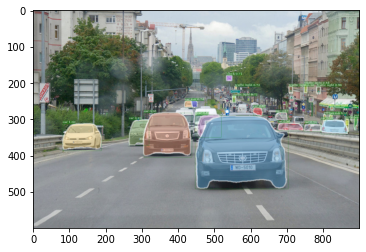

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt


for i in os.listdir('/content/output'):
  img=cv2.imread('/content/output/'+i)
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  plt.imshow(img)